# Extracting some insight from the Kostner blogs

In [8]:
from bs4 import BeautifulSoup
import requests
import re

Lets import some basic libraries to help with the web scraping. We'll be scraping links from this blog so that we can analyse the posts and maybe make some cool visualisations. 

In [3]:
page_link = 'https://kostner.com/blog/'
r = requests.get(page_link)
soup = BeautifulSoup(r.content)

Now that we have the html parsed by bs we can search for the hyperlinks in the file. We're interested in the blog posts, whose url all begin with the data of posting. We'll use this to determine which link can be followed to a blog post.

In [18]:
links = []
for link in soup.find_all('a', attrs={'href': re.compile("^https://kostner.com/\d")}):
    links.append(link.get('href'))

for link in links:
    print(link)

https://kostner.com/2019/04/10/why-throw-away-your-hard-earned-gold/
https://kostner.com/2019/04/10/why-throw-away-your-hard-earned-gold/#more-3973
https://kostner.com/2019/04/10/why-throw-away-your-hard-earned-gold/
https://kostner.com/2019/04/03/tidying-up-your-cloud-marie-kondo-style/
https://kostner.com/2019/04/03/tidying-up-your-cloud-marie-kondo-style/#more-3961
https://kostner.com/2019/04/03/tidying-up-your-cloud-marie-kondo-style/
https://kostner.com/2019/03/27/imagine-if-the-cio-and-cfo-shared-a-bed/
https://kostner.com/2019/03/27/imagine-if-the-cio-and-cfo-shared-a-bed/#more-3941
https://kostner.com/2019/03/27/imagine-if-the-cio-and-cfo-shared-a-bed/
https://kostner.com/2019/03/11/it-roles-are-changing-are-you-ready-for-the-future/
https://kostner.com/2019/03/11/it-roles-are-changing-are-you-ready-for-the-future/#more-3802
https://kostner.com/2019/03/11/it-roles-are-changing-are-you-ready-for-the-future/
https://kostner.com/2019/02/28/there-is-no-reason-to-overpay-for-cloud/


We can see that there are a lot of repeated links here, we should make a dictionary of posts which have a unique date, we can use the date as the key. 

In [38]:
unique_links = {}
for link in links:
    match = re.findall(r"(\d+/\d+/\d+)", link)
    if match:
        if match[0] not in unique_links:
            unique_links[match[0]] = link

In [39]:
for key, value in unique_links.items():
    print(key)
    print(value)

2019/04/10
https://kostner.com/2019/04/10/why-throw-away-your-hard-earned-gold/
2019/04/03
https://kostner.com/2019/04/03/tidying-up-your-cloud-marie-kondo-style/
2019/03/27
https://kostner.com/2019/03/27/imagine-if-the-cio-and-cfo-shared-a-bed/
2019/03/11
https://kostner.com/2019/03/11/it-roles-are-changing-are-you-ready-for-the-future/
2019/02/28
https://kostner.com/2019/02/28/there-is-no-reason-to-overpay-for-cloud/
2019/02/21
https://kostner.com/2019/02/21/cloud-shift-impacting-the-rise-in-global-it-spend/
2019/02/07
https://kostner.com/2019/02/07/3447/
2019/01/23
https://kostner.com/2019/01/23/ai-one-of-the-top-trends-impacting-infrastructure-and-operations-in-2019%ef%bb%bf/
2019/01/14
https://kostner.com/2019/01/14/top-challenges-facing-cios-today/
2018/12/20
https://kostner.com/2018/12/20/a-very-merry-ai-christmas/


Now that we have a dict of unique urls we can use them to scrape the content of the blog posts!
Before we move on, lets wrap all of this in a function for easier use.

In [40]:
def scrape_page(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    links = []
    for link in soup.find_all('a', attrs={'href': re.compile("^https://kostner.com/\d")}):
        links.append(link.get('href'))
    unique_links = {}
    for link in links:
        match = re.findall(r"(\d+/\d+/\d+)", link)
        if match:
            if match[0] not in unique_links:
                unique_links[match[0]] = link
    
    return unique_links

The blog posts are spread out over a number of pages, so lets loop over them and scrape each page individually, then update a dictionary with the links. 

In [47]:
scraped_links = {}
for i in range(1,5):
    scraped_links.update(scrape_page("https://kostner.com/blog/page/" + str(i)))
        
for key, value in scraped_links.items():
    print(key)
    print(value)

2019/04/10
https://kostner.com/2019/04/10/why-throw-away-your-hard-earned-gold/
2019/04/03
https://kostner.com/2019/04/03/tidying-up-your-cloud-marie-kondo-style/
2019/03/27
https://kostner.com/2019/03/27/imagine-if-the-cio-and-cfo-shared-a-bed/
2019/03/11
https://kostner.com/2019/03/11/it-roles-are-changing-are-you-ready-for-the-future/
2019/02/28
https://kostner.com/2019/02/28/there-is-no-reason-to-overpay-for-cloud/
2019/02/21
https://kostner.com/2019/02/21/cloud-shift-impacting-the-rise-in-global-it-spend/
2019/02/07
https://kostner.com/2019/02/07/3447/
2019/01/23
https://kostner.com/2019/01/23/ai-one-of-the-top-trends-impacting-infrastructure-and-operations-in-2019%ef%bb%bf/
2019/01/14
https://kostner.com/2019/01/14/top-challenges-facing-cios-today/
2018/12/20
https://kostner.com/2018/12/20/a-very-merry-ai-christmas/
2018/12/06
https://kostner.com/2018/12/06/building-a-business-on-the-backbone-of-ai/
2018/11/12
https://kostner.com/2018/11/12/it-spending-in-emea-is-projected-to-ris

Now we have all of our links, we can start analysing some of the content!
We can save the soup object in a dictionary, with the date as its key. This will allow us to do further analysis on the object, rather than chosing what to extract now. 

In [92]:
content = {}
for date, url in scraped_links.items():
    page_link = url
    r = requests.get(page_link)
    soup = BeautifulSoup(r.content)
    content[date] = soup

In [99]:
for date, soup in content.items():
    print(date)
    print(len(soup.find_all('p')))

2019/04/10
26
2019/04/03
30
2019/03/27
26
2019/03/11
28
2019/02/28
29
2019/02/21
28
2019/02/07
58
2019/01/23
28
2019/01/14
29
2018/12/20
23
2018/12/06
35
2018/11/12
28
2018/10/29
19
2018/10/24
25
2018/10/18
24
2018/10/17
21
2018/10/15
7
2018/09/26
16
2018/09/19
16
2018/04/12
24
2017/10/31
9
2017/09/15
6
2017/09/13
8
2017/07/03
18
2017/06/23
12
2017/06/16
13
2017/03/15
13


In [117]:
all_text = ""
for key, soup in content.items():
    paragraphs = soup.find_all('p')
    #print(paragraphs)
    textContent = ''
    for i in range(len(paragraphs)):
        text = paragraphs[i].text
        textContent += ' ' + text
    all_text += textContent

A fun thing to do might be to create a word cloud from all of the blog posts, for this we'll use the libraries below to analyse the bulk of the text. 

In [118]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


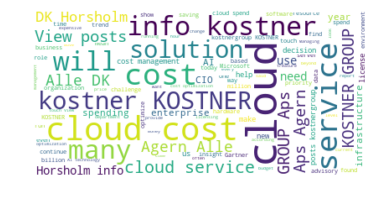

In [142]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Here we see a the frequency of words mentioned in the post. Clearly variations of 'Kostner' are frequent, unsurprisingly. We can remove these by using the stopwords parameter. Additionally, we can upload a mask to fit the cloud into. I chose to use a rotated 'K' due to its likeness to the company logo. 

In [154]:
mask = np.array(Image.open("kwhite.png"))

In [157]:
stopwords = set(STOPWORDS)
stopwords.update(["KOSTNER", "kostner", "Kostner"])

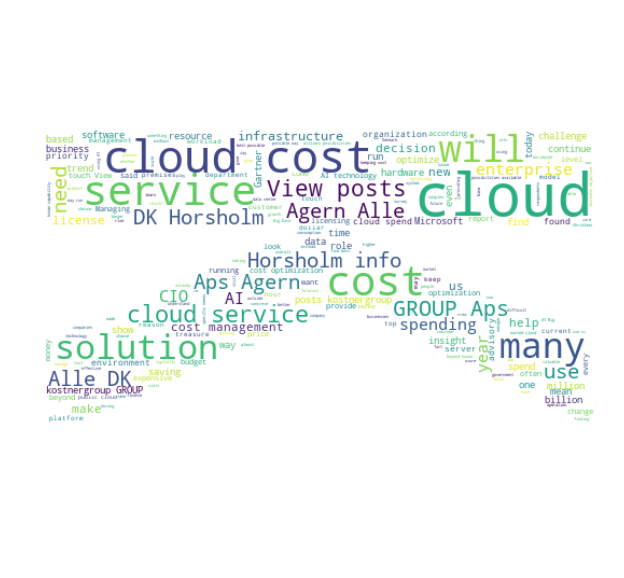

In [158]:
wc = WordCloud(background_color="white", max_words=10000, mask=mask,
               stopwords=stopwords, contour_width=1, contour_color='white')

# Generate a wordcloud
wc.generate(all_text)

# store to file
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Next we can have a look at the blog posts as a time series, to do this we'll convert the keys to datetime and then do a simple word count to see how large the posts were. 

In [165]:
def para_word_count(soup):
    count = 0 
    paras = soup.find_all('p')
    #print(paras)
    for entry in paras:
        count += len(entry.text.split())
    return count

In [167]:
x, y = [], []
for date, soup in content.items():
    x.append(date)
    y.append(para_word_count(soup))

In [176]:
import datetime as dt
x = [dt.datetime.strptime(d,'%Y/%m/%d').date() for d in x]

Text(0, 0.5, 'Word Count')

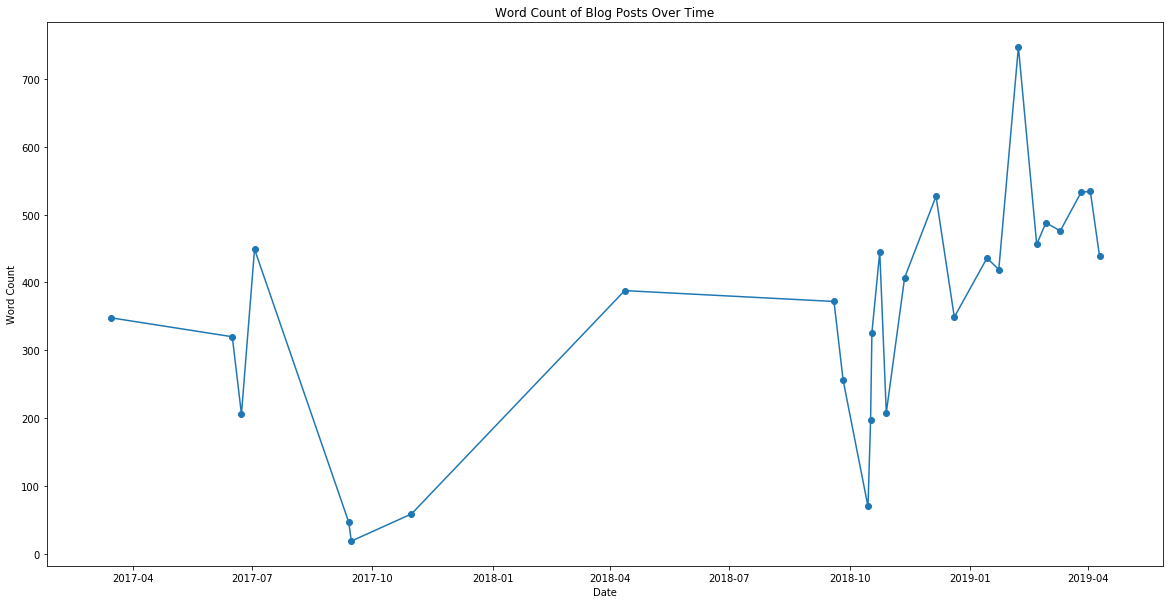

In [183]:
plt.figure(figsize=[20,10])
plt.scatter(x,y)
plt.plot(x,y)
plt.title('Word Count of Blog Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Word Count')

From this graph we can see that the frequency of blog posts has really picked up over the last year. There also seems to be a slight trend towards longer blog posts. 